In [18]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [26]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
distance_x = ctrl.Antecedent(np.arange(-1, 1, 0.01), 'distance_x')
motor_x = ctrl.Consequent(np.arange(-1, 1, 0.01), 'motor_x')

motor_x.defuzzify_method = 'mom'

# Custom membership functions can be built interactively with a familiar,
# Pythonic API
distance_x['-far'] = fuzz.gbellmf(distance_x.universe, 0.2, 3, -1)
distance_x['-average'] = fuzz.gbellmf(distance_x.universe, 0.2, 3, -0.7)
distance_x['-close'] = fuzz.gbellmf(distance_x.universe, 0.2, 3, -0.3)
distance_x['zero'] = fuzz.trimf(distance_x.universe, [-0.3, 0, 0.3])
distance_x['+close'] = fuzz.gbellmf(distance_x.universe, 0.2, 3, 0.3)
distance_x['+average'] = fuzz.gbellmf(distance_x.universe, 0.2, 3, 0.7)
distance_x['+far'] = fuzz.gbellmf(distance_x.universe, 0.2, 3, 1)

# Output membership functions 
motor_x['-high'] = fuzz.gbellmf(motor_x.universe, 0.2, 3, -1)
motor_x['-average'] = fuzz.gbellmf(motor_x.universe, 0.2, 3, -0.7)
motor_x['-low'] = fuzz.gbellmf(motor_x.universe, 0.2, 3, -0.3)
motor_x['zero'] = fuzz.trimf(motor_x.universe, [-0.3, 0, 0.3])
motor_x['+low'] = fuzz.gbellmf(motor_x.universe, 0.2, 3, 0.3)
motor_x['+average'] = fuzz.gbellmf(motor_x.universe, 0.2, 3, 0.7)
motor_x['+high'] = fuzz.gbellmf(motor_x.universe, 0.2, 3, 1)

C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


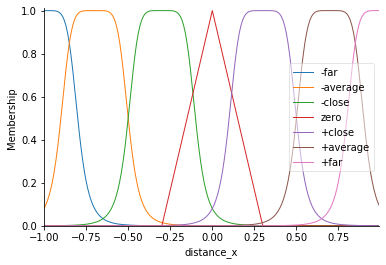

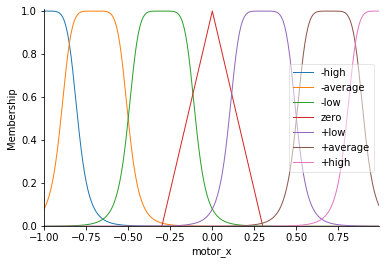

In [27]:
distance_x.view()
motor_x.view()

In [28]:
# print(help(motor_1['high'] & motor_2['medium']))
rule1 = ctrl.Rule(distance_x['+far'], motor_x['+high'])
rule2 = ctrl.Rule(distance_x['+average'], motor_x['+average'])
rule3 = ctrl.Rule(distance_x['+close'], motor_x['+low'])
rule4 = ctrl.Rule(distance_x['zero'], motor_x['zero'])
rule5 = ctrl.Rule(distance_x['-close'], motor_x['-low'])
rule6 = ctrl.Rule(distance_x['-average'], motor_x['-average'])
rule7 = ctrl.Rule(distance_x['-far'], motor_x['-high'])


In [29]:
x_motion_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
x_motion = ctrl.ControlSystemSimulation(x_motion_control)

In [32]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
x_motion.input['distance_x'] = 0
# Crunch the numbers
x_motion.compute()

C:\Users\Sony\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


3.834730152466446e-16


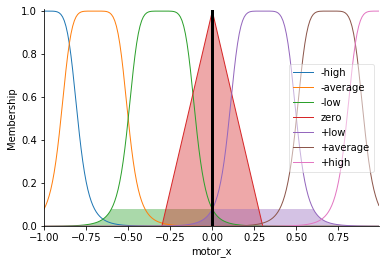

In [33]:
motor_x.view(sim=x_motion)
print(x_motion.output['motor_x'])